<a href="https://colab.research.google.com/github/prithvi394/DV_Team7/blob/main/DataVisualization_Team7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/Team7'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Team7


{' 10th': {'Salary <= 50k': 871, 'Salary > 50k': 0}, ' 11th': {'Salary <= 50k': 1115, 'Salary > 50k': 0}, ' 12th': {'Salary <= 50k': 400, 'Salary > 50k': 0}, ' 1st-4th': {'Salary <= 50k': 162, 'Salary > 50k': 0}, ' 5th-6th': {'Salary <= 50k': 317, 'Salary > 50k': 0}, ' 7th-8th': {'Salary <= 50k': 606, 'Salary > 50k': 0}, ' 9th': {'Salary <= 50k': 487, 'Salary > 50k': 0}, ' Assoc-acdm': {'Salary <= 50k': 802, 'Salary > 50k': 0}, ' Assoc-voc': {'Salary <= 50k': 1021, 'Salary > 50k': 0}, ' Bachelors': {'Salary <= 50k': 3134, 'Salary > 50k': 0}, ' Doctorate': {'Salary <= 50k': 107, 'Salary > 50k': 0}, ' HS-grad': {'Salary <= 50k': 8826, 'Salary > 50k': 0}, ' Masters': {'Salary <= 50k': 764, 'Salary > 50k': 0}, ' Preschool': {'Salary <= 50k': 51, 'Salary > 50k': 0}, ' Prof-school': {'Salary <= 50k': 153, 'Salary > 50k': 0}, ' Some-college': {'Salary <= 50k': 5904, 'Salary > 50k': 0}}
--------------------
{' 10th': {'Salary <= 50k': 871, 'Salary > 50k': 62}, ' 11th': {'Salary <= 50k': 1115, 

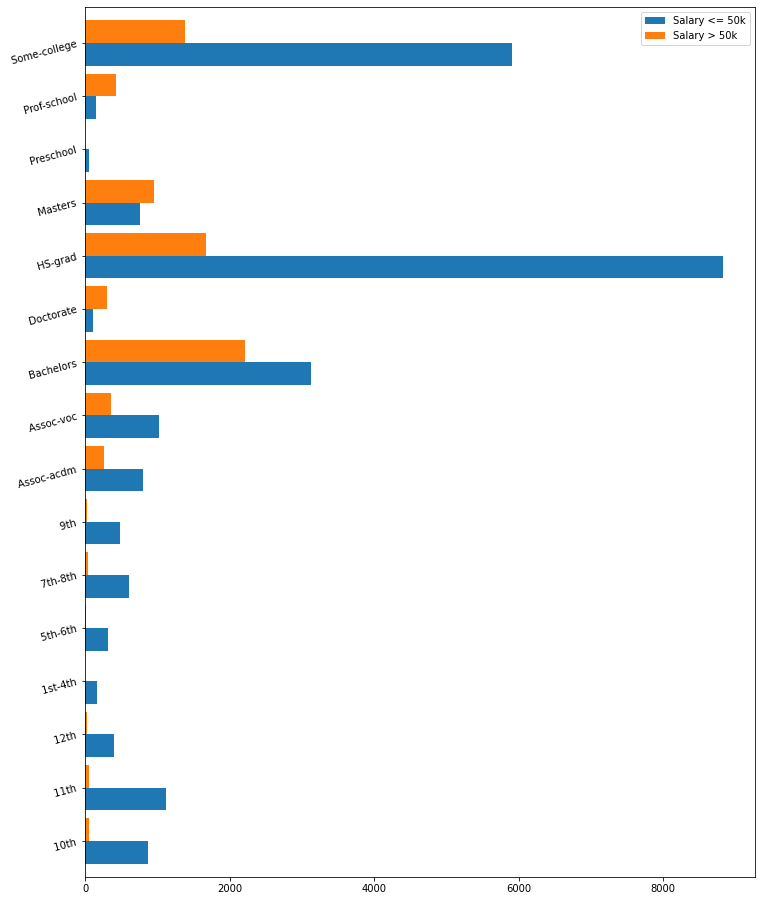

In [133]:
# Analysis for degree level vs salaryimport sqlite3

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plot
from google.colab import files


con = sqlite3.Connection('newdb.sqlite')
cur = con.cursor()

result_dict={}

cur.execute("Select degree,COUNT(degree) from adult where salary= ' <=50K' group by degree ;")

for record in cur.fetchall():
  #inner_map={}
  #print(record)
  inner_map={"Salary <= 50k" : record[1], "Salary > 50k" : 0}
  #print(inner_map)
  result_dict[record[0]]=inner_map

print (result_dict)
print("--------------------")

cur.execute("Select degree,COUNT(degree) from adult where salary= ' >50K' group by degree ;")

for record_dash in cur.fetchall():
  #print(record_dash)
  if record_dash[0] in result_dict:
    updated_inner_map = result_dict.get(record_dash[0])
    updated_inner_map['Salary > 50k']=record_dash[1]
    #print(updated_inner_map)
    result_dict[record_dash[0]]=updated_inner_map
  else:
    new_unique_map={"Salary <= 50k" : 0 , "Salary > 50k" : record_dash[1]}
    result_dict[record_dash[0]]=new_unique_map

print (result_dict)
print("--------------------")

dataframe = pd.DataFrame.from_dict(result_dict).T
dataframe.plot.barh(rot=15,figsize=(12,16),width=0.85)

plot.show(block=True);

#dataframe.plot(figsize=(10,10))
#plot.savefig("abc.png")
#files.download("abc.png") 


#for p in barplot.patches:
#barplot.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# convert to data frame 
# .T transposes letter categories to the x-axis
#dataframe = pd.DataFrame.from_dict(result_dict,orient="index").T

# plot grouped bar chart
#dataframe.plot(kind="bar")